# Marketing Analytics Manager Test Solution

**Overview and Instructions:**
The data/ directory contains fifty CSV files (one per week) of timestamped sales data. Each row in a file has two columns:
- _sale_time_ - The timestamp on which the sale was made e.g. 2012-10-01 01:42:22
- _purchaser_gender_ - The gender of the person who purchased (male or female)
    
Please answer the questions below based on the data provided. In addition, please attach the source code for your analysis.

## What They Are Testing For?

Onsite interviews generally put pressure on candidates, so a candidate might not perform their best skills. Also, interviewers need to invest a significant amount of time from their schedule in the recruiting process. Take-home assignments play a crucial role in the recruitment of companies to eliminate onsite interview noise on the performance, and also false-true candidates seem correct person for the role but are not skilled as required.

The difficulty level of a take-home assignment depends on several factors such as the job description, company, given time, etc. In this assignment, the company is interested in your data analysis and statistics knowledge and how comfortable you are with common data analysis tools such as Pandas. Another important point is your coding quality, which is a combination of your function definition, commenting, name assignment, list/dictionary comprehension, etc., styles. As long as your code is easy to follow and understand, there is nothing to worry about. Do not use complex expressions to show off your knowledge. At this stage, it is not expected you to know the coding conventions at the company. All will be taken care of in onboarding if you successfully pass your interviews. 

For data science, it is a precious ability to know shortcut functions and some programming concepts that save time. Using groupby, indexing functions, statistical and arithmetical operations on the dataset are good signs. Also, data visualization tools are important. It does not matter which tool you use (matplotlib, pandas.plot, seaborn) as long as your plots are understandable with title and axis labels. 

Throughout this tutorial, we will see some of the mentioned concepts (tools, plots, coding style, etc.) in solutions. 

## Data Exploration

Before diving into the questions, let's apply some data exploration techniques to have a better understanding on what we are dealing in the dataset. We'll start with importing a few useful libraries. We will use _pandas_ to create and analyse the dataset, and _matplotlib.pyplot_ to do plot graphs to visualize our answers. Glob will be used just to get all filenames under the /data directory.

In [1]:
# import libraries 
import pandas as pd
import matplotlib.pyplot as plt 
import glob

We can tweak the default plotting parameters to make our plots easily comprehensible. Even though we can change multiple parameters of our plots to make them fancy, today we are only interested in making them larger. So, we are defining a new figure size which we'll use in next cells.

In [2]:
# assign a constant figure size and use it in plotting to make plots larger
FIG_SIZE = (8,6)

Let's create our dataset. First, we need to get all filenames under the /data directory in a list so we can concat them in one dataset using pandas concat function which can accept a list as input. This method prevents us to use a for loop to iterate over files, read them separately and append on a dataset. Therefore, it decreases the complexity and saves us time.

In [3]:
# get all filenames under the data directory 
l = [pd.read_csv(filename) for filename in glob.glob("./data/*.csv")]

# check the list size to understand how many files will be read
len(l)

50

We have 50 files under the /data directory. So, we should have a list including 50 filenames.

In [4]:
#  create the dataset using all files under the data directory
df = pd.concat(l, axis=0)
df.head()

,sale_time,purchaser_gender
0,2013-01-07 02:14:07,female
1,2013-01-07 02:57:53,male
2,2013-01-07 02:59:49,female
3,2013-01-07 03:02:53,male
4,2013-01-07 03:27:36,female


The instructions say the dataset includes two columns. Let's check our dataset. 

In [5]:
df.columns

Index(['sale_time', 'purchaser_gender'], dtype='object')

In [6]:
df.shape

(204329, 2)

It is consistent with what given to us in the overview section. By counting the sale entries for each day, we can obtain the sales amount for each day. Then, we can analyze the sales of the company. We will obtain the sales amount in a few steps. To begin with, we'll extract the sale day (year - month - day) from a complete timestamp (year - month - day hour - second - milisecond). We need to convert the sale_time column datatype to datetime since pandas library provides several functions to conveniently manipulate timestamps.

In [7]:
sale_day = pd.to_datetime(df['sale_time'])

Now, we can get the day by flooring the timestamp to the closest day. After that, we will group the sales entries by days with the _groupby( )_ function. Then we will count the entries in each group (which are the sale days in our case) with _size( )_ , which gives us the sales amount for each day. Groupby objects use the given column as index. As the last step, we will reformat the dataset with _reset_index( )_ function to get rid of sale day indexes. 

In [8]:
daily_sales_df = sale_day.groupby(sale_day.dt.floor('d')).size().reset_index(name='sales_amount')
daily_sales_df.rename(columns={'sale_time':'sale_day'},inplace=True)
daily_sales_df.head()

,sale_day,sales_amount
0,2012-10-01,514
1,2012-10-02,482
2,2012-10-03,499
3,2012-10-04,546
4,2012-10-05,476


We continue to comprehending our dataset with some statistical metrics. _describe( )_ function provide us the main statistical metrics for columns.

In [9]:
daily_sales_df['sales_amount'].describe()

count    350.000000
mean     583.797143
std      105.152783
min      401.000000
25%      496.000000
50%      546.000000
75%      688.750000
max      801.000000
Name: sales_amount, dtype: float64

The output says we have 350 different days in the dataset, which is aligned with our expectations since we already know the given data includes 50 weeks (50 x 7 = 350 days). The mean of sales amount column is around 583, which means the mean of daily sales is around 583. The max and min daily sales are 401 and 801, in order.

Let's also check the daily sales amount over genders. We need to groupby the initial dataset by genders.

In [10]:
gender_sales_df = df.groupby(df.purchaser_gender).size().reset_index(name='sales_amount')
gender_sales_df.head()

,purchaser_gender,sales_amount
0,female,107740
1,male,96589


According to above output, we can say female customers shop more comparing to male customers. 

Another interesting thing we could check with the sales amount and their timestamps is seasonal trends. Check the beginning and end dates of our dataset.

In [11]:
df.sale_time.min(), df.sale_time.max()

('2012-10-01 01:42:22', '2013-09-15 23:48:47')

Since we do not have data belong to different year, we can not check seasonality over years. Still, we can look over the last months and see if there is a trend.

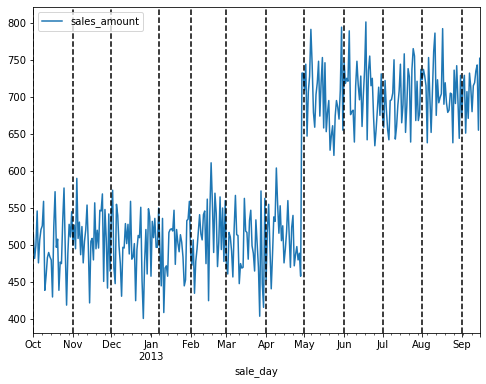

In [12]:
ax = daily_sales_df.plot(x='sale_day', y='sales_amount', figsize=FIG_SIZE)
xcoords = ['2012-10-01','2012-11-01','2012-12-01',
           '2013-01-07', '2013-02-01','2013-03-01', 
           '2013-04-01', '2013-05-01', '2013-06-01', 
           '2013-07-01', '2013-08-01', '2013-09-01']
for xc in xcoords:
    plt.axvline(x=xc, color='black', linestyle='--')

It doesn't seem the sales amount have a clear correlation with months. 

We analyzed our dataset from different perspectives. Now, we are ready to continue with questions. 

## Question 1

**Plot daily sales for all 50 weeks.**

We will produce a plot similar to one we used to check trends above. We won't mark the months this time. Pandas _plot( )_ function provides us ability to plot the data without using other library. In default, it uses dataset index as x-axis and other columns as y-axis values. Our daily_sales_df index will be sale_day which are the days sales are occured. The only column of daily_sales_df will be sales_amount which we calculated before. This is one of the alternative methods to plot. _plot( )_ function also provides flexibility to choose axis columns when we have multiple columns in the dataset. 

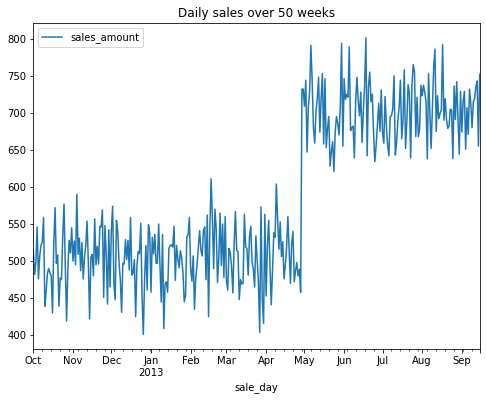

In [13]:
#  to use index in plotting make sale_day index
daily_sales_df.index = daily_sales_df['sale_day']
daily_sales_df.drop(columns=['sale_day'], inplace=True)

#  plot daily sales for all 50 weeks
daily_sales_df.plot(figsize=FIG_SIZE, title = "Daily sales over 50 weeks")
plt.show()

We plotted the daily sales over to 50 weeks and observe a sudden change around May, which is the topic of next question.

## Question 2

**It looks like there has been a sudden change in daily sales. What date did it occur?**

This question interested in the sudden change we observed in the plot above. To be able to say the exact date of this change occur, we need to compare sales amount difference with the previous day and find the biggest difference which should give us the sudden change in the sales amount. Since we do not know the previous day data of the first row in our data set, we can use None instead of. Also, our last sales_amount is the previous day sales amount of a date (2013-09-15) not in dataset, so we won't use it.

In [14]:
daily_sales_df['prev_day_sale_amount'] = [None] + daily_sales_df['sales_amount'].to_list()[:-1]
daily_sales_df['difference_btw_prev_day'] = daily_sales_df['sales_amount'] - daily_sales_df['prev_day_sale_amount']
daily_sales_df.head()

,sales_amount,prev_day_sale_amount,difference_btw_prev_day
sale_day,,,
2012-10-01,514,NaN,NaN
2012-10-02,482,514.0,-32.0
2012-10-03,499,482.0,17.0
2012-10-04,546,499.0,47.0
2012-10-05,476,546.0,-70.0


We see 'NaN' values in the first row. Pandas interprets Python 'None' value as NaN. Since we obtained difference between days, we can get the maximum difference and see its index, which is the date that sales amount occured. _idxmax( )_ function returns the index of max value in given column. 

In [15]:
# get the index of max change to answer what date did it occur
print(daily_sales_df['difference_btw_prev_day'].idxmax(axis="columns"))
daily_sales_df[daily_sales_df.index == '2013-04-29']

2013-04-29 00:00:00


,sales_amount,prev_day_sale_amount,difference_btw_prev_day
sale_day,,,
2013-04-29,732,458.0,274.0


The date of sudden change is '2013-04-29'. With using this date as index, we can get the sales amount at this particular date.

## Question 3

**Is the change in daily sales at the date you selected statistically significant? If so, what is the p-value?**

Statistical significance decided by t-test in statistics. Scipy, a library that implements several scientific concepts in Python, includes stats module to apply t-test. We want to understand the importance of a specific sample, so we'll use _ttest_lsamp( )_ function. 

In [16]:
# scipy.stats include a function to do t-test and obtain p-value
from scipy import stats

# first drop all nan values (if any) for the test 
daily_sales_df.dropna(inplace=True)

# then compare the max change with all sales_amount column 
# to understand its statistical importance
stats.ttest_1samp(daily_sales_df['sales_amount'], 732)

Ttest_1sampResult(statistic=-26.273266340051002, pvalue=1.3019593251472396e-84)

The obtained p-value as the result of t-test is 1.3019593251472396e-84 which is lower than 0.05 (we can assume the threshold as 0.05 as a common practice). It leads to decide this particular date is important for us.

## Question 4

**Does the data suggest that the change in daily sales is due to a shift in the proportion of male-vs-female customers? Please use plots to support your answer (a rigorous statistical analysis is not necessary).**

This question implies a dramatic change might be happened in male-vs-female customers at the date of sudden change. We can observe whether this assumption is valid or not by plotting sales amount with gender portions over 50 weeks. We will groupby our initial dataset, which includes purchaser_gender column, by first sale_day then purchaser gender. It return us daily sales amount by genders. 

In [17]:
# create gender_portions_df to analyze sales distribution over genders
df['sale_day'] = pd.to_datetime(df['sale_time']).dt.floor('d')
gender_portions_df = df.groupby(['sale_day', 'purchaser_gender']).size().reset_index(name='sales_amount')

In [18]:
gender_portions_df

,sale_day,purchaser_gender,sales_amount
0,2012-10-01,female,413
1,2012-10-01,male,101
2,2012-10-02,female,379
3,2012-10-02,male,103
4,2012-10-03,female,386
...,...,...,...
695,2013-09-13,male,537
696,2013-09-14,female,193
697,2013-09-14,male,462
698,2013-09-15,female,230


After filtering the previous dataset by female and male genders, we can obtain female_sales_amount and male_sales_amount columns for each day.

In [19]:
# calculate female and male sales amount separately
new_df = pd.DataFrame(gender_portions_df['sale_day'].unique(),columns=['sale_day'])
new_df['female_sales_amount'] = pd.Series(gender_portions_df[gender_portions_df.purchaser_gender == 'female']['sales_amount']).reset_index(drop=True)
new_df['male_sales_amount'] = pd.Series(gender_portions_df[gender_portions_df.purchaser_gender == 'male']['sales_amount']).reset_index(drop=True)
new_df[-5:]

,sale_day,female_sales_amount,male_sales_amount
345,2013-09-11,224,495
346,2013-09-12,225,510
347,2013-09-13,206,537
348,2013-09-14,193,462
349,2013-09-15,230,522


With our new columns, we basically divide male_sales_amount to female_sales_amount to calculate gender ratio among customers per day.

In [20]:
# calculate gender ratio of sales
new_df['gender_ratio'] = new_df['male_sales_amount']/new_df['female_sales_amount']
new_df.head()

,sale_day,female_sales_amount,male_sales_amount,gender_ratio
0,2012-10-01,413,101,0.244552
1,2012-10-02,379,103,0.271768
2,2012-10-03,386,113,0.292746
3,2012-10-04,432,114,0.263889
4,2012-10-05,368,108,0.293478


Now, we will plot gender ratio change over 50 weeks with the total sales amount to observe if there is a correlation between them. _secondary_y_ argument of _plot( )_ function solves the problem of having two different scales in one plot. It rescales the secondary y with a new y axis in the right side of plot.

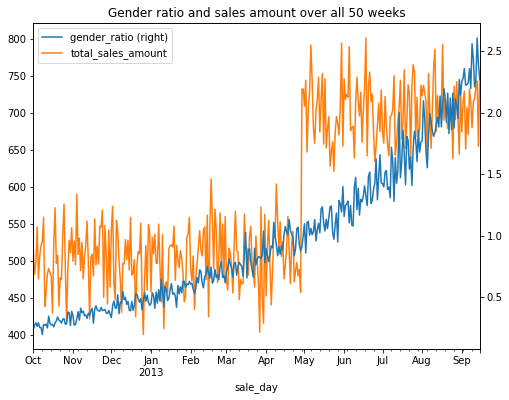

In [21]:
# copy() function creates a new dataframe as a copy of the given dataframe
plot_df = new_df.copy()
plot_df['total_sales_amount']  = plot_df['male_sales_amount'] + plot_df['female_sales_amount']

# do not need anymore sales amounts by gender,we used them to calculate gender ratio
plot_df.drop(columns=['female_sales_amount', 'male_sales_amount'], inplace=True)
plot_df.index = plot_df['sale_day']
plot_df.drop(columns=['sale_day'], inplace=True)
plot_df.plot(secondary_y = ['gender_ratio'],figsize=FIG_SIZE, title= "Gender ratio and sales amount over all 50 weeks")
plt.show()

The increase trend of male ratio in the sales amount does not explain the sudden change. The reason should be something different. For example, it might be caused by starting a new marketing campaign or adding a new feature to the website.

## Question 5

**Assume a given day is divided into four dayparts: night (12:00AM - 6:00AM), morning (6:00AM to 12:00PM), afternoon (12:00PM to 6:00PM) and evening (6:00PM - 12:00AM). What is the percentage of sales in each daypart over all 50 weeks?**

To understand the sales amount distribution over particular parts of the day, we need to calculate specific sales amount within mentioned parts. Again, pandas datetime datatype help us to get hours in timestamps so we can divide the day to parts according to hours. Therefore, we start with changing initial dataset sale_time column to datetime object. We can check the datatypes with .dtypes.

In [22]:
# extract sale hour to divide sales to the part of days
df['sale_hour']  = pd.to_datetime(df['sale_time']).dt.ceil('h').dt.hour
df.dtypes

sale_time                   object
purchaser_gender            object
sale_day            datetime64[ns]
sale_hour                    int64
dtype: object

We can define functions to apply some manipulations on dataframe columns. The following function encodes the logic given in the question.

In [23]:
# define a function to apply sale hour column to decide a part of day based on the mentioned logic
def assign_day_part(sale_hour):
    if sale_hour > 6 and sale_hour < 12:
        return 'morning'
    if sale_hour > 12 and sale_hour < 18:
        return 'afternoon'
    if sale_hour > 18 and sale_hour < 24:
        return 'evening'
    if sale_hour > -1 and sale_hour < 6:
        return 'night'

After defining the function, we can apply it with using a specific column of the dataframe as input with _apply( )_. It save us to iterate over the dataframe, so, reduces the complexity.   

In [24]:
# apply the defined function and create day_part column
df['day_part'] = df['sale_hour'].apply(assign_day_part)

# drop unnecessary columns
df.drop(columns = ['purchaser_gender', 'sale_hour', 'sale_time'], inplace= True)
df

,sale_day,day_part
0,2013-01-07,night
1,2013-01-07,night
2,2013-01-07,night
3,2013-01-07,night
4,2013-01-07,night
...,...,...
4970,2013-08-18,night
4971,2013-08-18,night
4972,2013-08-18,night
4973,2013-08-18,night


We can check some entries with different parts of the day.

In [25]:
df[df.day_part == 'afternoon']

,sale_day,day_part
209,2013-01-07,afternoon
210,2013-01-07,afternoon
211,2013-01-07,afternoon
212,2013-01-07,afternoon
213,2013-01-07,afternoon
...,...,...
4796,2013-08-18,afternoon
4797,2013-08-18,afternoon
4798,2013-08-18,afternoon
4799,2013-08-18,afternoon


The only remaining step to answer the question is, calculating total sales amount per day part. We will use the _groupby( )_ function one last time to obtain total sales amount by day parts. Then we can divide each day part sales amount to total sales amount of all 50 weeks. We obtain the total sales amount with _sum( )_ function.

In [26]:
# calculate sales amount per day part
df_pct_sales = df.groupby(df.day_part).size().reset_index(name='day_part_sales_amount')

# calculate sales amount percentage per day part
df_pct_sales['day_part_sales_percentage'] = df_pct_sales['day_part_sales_amount'] / df_pct_sales['day_part_sales_amount'].sum()

In [27]:
df_pct_sales

,day_part,day_part_sales_amount,day_part_sales_percentage
0,afternoon,68119,0.394595
1,evening,41111,0.238145
2,morning,49833,0.288669
3,night,13567,0.078590


As a conclusion, we can say the customers of this company do more shopping in afternoon and very less shopping in nights.